In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [9]:
#carga los datos
tenencias = pd.read_csv('..\Data\BNK_FCT_TENENCIA.csv', sep = ";")


In [10]:
# Obtener el nombre de las columnas
columnas = tenencias.columns

# Mostrar los nombres de las columnas
for columna in columnas:
    print(columna)

AGNO_MES
ID_CLIENTE
FECHA_DATO
CT_AHO
GARANT
CT_CTE
CT_DER
CT_NOM
CT_JOV
CT_PMAS
CT_PART
CT_PPLUS
DAP_CP
DAP_MP
DAP_LP
CT_DIG
FFMM
HIPOTEC
FFPP
CCUOTA
RECAUD
TARJ_CRE
FFVV
CT_HOGAR
PAGO_SUELD
PAGO_PENSI
DEBITO_DIR
FECHA_PROCESO


In [11]:
tenencias['Suma'] = tenencias['CT_AHO'] + tenencias['GARANT'] + tenencias['CT_CTE'] + tenencias['CT_DER'] + tenencias['CT_NOM'] + tenencias['CT_JOV'] + \
             tenencias['CT_PMAS'] + tenencias['CT_PART'] + tenencias['CT_PPLUS'] + tenencias['DAP_CP'] + tenencias['DAP_MP'] + \
             tenencias['DAP_LP'] + tenencias['CT_DIG'] + tenencias['FFMM'] + tenencias['HIPOTEC'] + tenencias['FFPP'] + tenencias['CCUOTA'] + \
             tenencias['RECAUD'] + tenencias['TARJ_CRE'] + tenencias['FFVV'] + tenencias['CT_HOGAR'] + tenencias['PAGO_SUELD'] + \
             tenencias['PAGO_PENSI'] + tenencias['DEBITO_DIR']

In [12]:
tenencias_importantes_y_suma = tenencias[["ID_CLIENTE", "FECHA_DATO", "CT_CTE", "DEBITO_DIR", "Suma"]]
tenencias_importantes_y_suma

,ID_CLIENTE,FECHA_DATO,CT_CTE,DEBITO_DIR,Suma
0,1375586,2015-01-28 00:00:00,1,0,1
1,1050611,2015-01-28 00:00:00,1,0,1
2,1050612,2015-01-28 00:00:00,1,0,1
3,1050613,2015-01-28 00:00:00,0,0,1
4,1050614,2015-01-28 00:00:00,1,0,1
...,...,...,...,...,...
13647304,1553685,2016-05-28 00:00:00,0,0,0
13647305,1553686,2016-05-28 00:00:00,0,0,0
13647306,1553687,2016-05-28 00:00:00,0,0,0
13647307,1553616,2016-05-28 00:00:00,0,0,0


In [13]:
tenencias_importantes_y_suma["Suma"].mean()

1.4620212673428878

In [15]:
tabla_final = pd.read_csv('..\Tabla_final_colab.csv', sep = ",")
tabla_final.head()

,CT_CTE,DEBITO_DIR,FECHA_DATO,ID_EMPLEADO,ID_SEGMENTO_VALOR,ANTIGUEDAD,ID_CLIENTE,RENTA,EDAD,EDAD_PUNTAJE,ID_GENERO,FLAG_PREAP,ID_PROD,FECHA_PROCESO,ACEPTADO
0,1.0,0.0,2015-01-28 00:00:00,0.0,2.0,6.0,1375586.0,87218.10,36.0,3.0,1.0,Y,TARJ_CRE,2015-01-27 22:56:52,0.0
1,1.0,0.0,2015-01-28 00:00:00,0.0,1.0,35.0,1050612.0,122179.11,23.0,1.0,0.0,Y,TARJ_CRE,2015-01-27 22:56:52,0.0
2,0.0,0.0,2015-01-28 00:00:00,0.0,1.0,35.0,1050613.0,119775.54,23.0,1.0,1.0,Y,TARJ_CRE,2015-01-27 22:56:52,0.0
3,1.0,0.0,2015-01-28 00:00:00,0.0,1.0,35.0,1050615.0,22220.04,24.0,1.0,1.0,Y,TARJ_CRE,2015-01-27 22:56:52,0.0
4,1.0,0.0,2015-01-28 00:00:00,0.0,1.0,35.0,1050616.0,295590.36,24.0,1.0,1.0,Y,TARJ_CRE,2015-01-27 22:56:52,0.0


In [16]:
tabla_final_id_fe_ac = tabla_final[["FECHA_DATO", "ID_CLIENTE", "ACEPTADO"]]
tabla_final_id_fe_ac

,FECHA_DATO,ID_CLIENTE,ACEPTADO
0,2015-01-28 00:00:00,1375586.0,0.0
1,2015-01-28 00:00:00,1050612.0,0.0
2,2015-01-28 00:00:00,1050613.0,0.0
3,2015-01-28 00:00:00,1050615.0,0.0
4,2015-01-28 00:00:00,1050616.0,0.0
...,...,...,...
602555,2016-02-28 00:00:00,899549.0,0.0
602556,2016-03-28 00:00:00,1441442.0,0.0
602557,2016-03-28 00:00:00,1454431.0,0.0
602558,2016-03-28 00:00:00,56812.0,0.0


In [17]:
tenencia_clientes_personas_importante = pd.merge(tabla_final_id_fe_ac, tenencias_importantes_y_suma, on = ['ID_CLIENTE', 'FECHA_DATO'], how='right')
tenencia_clientes_personas_importante.dropna(inplace=True)
tenencia_clientes_personas_importante

,FECHA_DATO,ID_CLIENTE,ACEPTADO,CT_CTE,DEBITO_DIR,Suma
0,2015-01-28 00:00:00,1375586.0,0.0,1,0,1
2,2015-01-28 00:00:00,1050612.0,0.0,1,0,1
3,2015-01-28 00:00:00,1050613.0,0.0,0,0,1
5,2015-01-28 00:00:00,1050615.0,0.0,1,0,1
6,2015-01-28 00:00:00,1050616.0,0.0,1,0,1
...,...,...,...,...,...,...
10770231,2016-02-28 00:00:00,1424089.0,0.0,1,0,1
10865314,2016-03-28 00:00:00,1441442.0,0.0,0,0,0
10888449,2016-03-28 00:00:00,1454431.0,0.0,0,0,0
11152271,2016-03-28 00:00:00,56812.0,0.0,0,0,0


<Axes: >

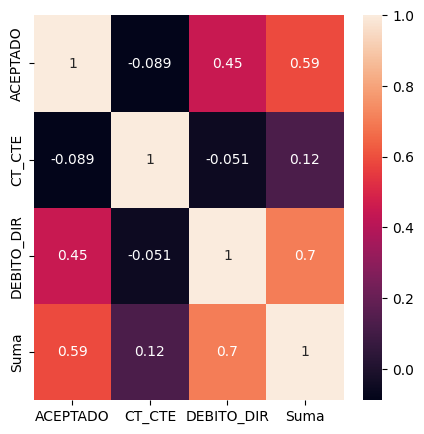

In [18]:
tenencia_total_aceptaron = tenencia_clientes_personas_importante[["ACEPTADO", "CT_CTE", "DEBITO_DIR", "Suma"]]
corr = tenencia_total_aceptaron.corr().values
plt.figure(figsize = (5,5))
correlation_matrix = tenencia_total_aceptaron.corr()
sns.heatmap(data = correlation_matrix, annot = True)

In [19]:
tenencia_clientes_personas_importante.to_csv(r'info_tenencias.csv', index=False, header=True)